<a href="https://colab.research.google.com/github/gyrsh/test/blob/master/model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
def softmax(x):
    v=np.exp(x)
    v=v/np.sum(x,keepdims=True)
    return v

In [3]:
x=[[1,2],[2,13]]
print(softmax(x))

[[1.51015657e-01 4.10503117e-01]
 [4.10503117e-01 2.45785218e+04]]


In [0]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.rand(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.rand(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.rand(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        print(W1)
        print(W2)
        print(W3)
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] = self.model['W1']-learning_rate*dw1
        self.model['W2'] = self.model['W2']-learning_rate*dw2
        self.model['W3'] = self.model['W3']-learning_rate*dw3
        
        self.model['b1'] = self.model['b1']-learning_rate*db1
        self.model['b2'] = self.model['b2']-learning_rate*db2
        self.model['b3'] = self.model['b3']-learning_rate*db3
   
    def printing(self):
        print(self.model['W1'])
        print(self.model['W2'])
        print(self.model['W3'])
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [0]:

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [0]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    Y_HOT=one_hot(Y,classes)
    for i in range(epochs):
        Y_=model.forward(X)
        l=loss(Y_HOT,Y_)
        training_loss.append(l)
        model.backward(X,Y_,learning_rate)
        #model.printing()
        if(logs):
            print("loss in %d epoch is %f"%(i,l))
    return training_loss

In [0]:
model=NeuralNetwork(input_size=2,layers=[12,3],output_size=2)

In [0]:
#dataset 
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [0]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

In [10]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


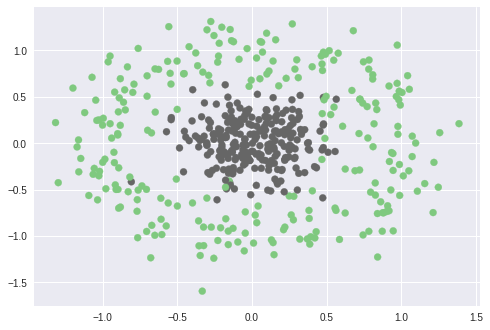

In [11]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [12]:
losses=train(X,Y,model,50,100)

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
  0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918]]
[[0.11827443 0.63992102 0.14335329]
 [0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033]
 [0.56843395 0.0187898  0.6176355 ]
 [0.61209572 0.616934   0.94374808]
 [0.6818203  0.3595079  0.43703195]
 [0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263 ]
 [0.31542835 0.36371077 0.57019677]
 [0.43860151 0.98837384 0.10204481]
 [0.20887676 0.16130952 0.65310833]
 [0.2532916  0.46631077 0.24442559]]
[[0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]]
loss in 0 epoch is 1.302153
[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293  0.020

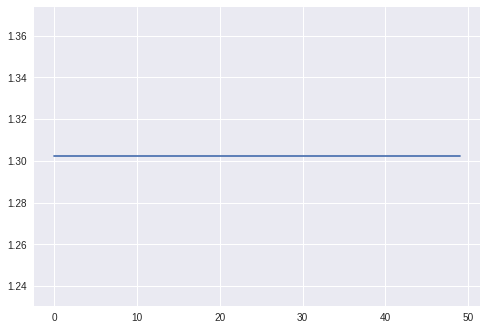

In [13]:
plt.plot(losses)
plt.show()